<h1>Extracting and Visualizing Tesla and GME Revenue Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, we will extract some stock data, we will then display this data in a graph.


In [1]:
!pip install yfinance==0.1.67
#!pip install pandas==1.3.3
#!pip install requests==2.26.0
!mamba install bs4==4.10.0 -y
#!pip install plotly==5.3.1


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (0.15.3) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

pkgs/main/linux-64       [>                   ] (--:--) No change
pkgs/main/linux-

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, we should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [3]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Using yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [4]:
tesla = yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [5]:
tesla_data = tesla.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [6]:
tesla_data.reset_index(inplace=True)
tesla_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


## Using Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage [https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue](https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork23455606-2021-01-01). Save the text of the response as a variable named `html_data`.


In [7]:
url="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text

Parse the html data using `beautiful_soup`.


In [8]:
soup = BeautifulSoup(html_data, "html.parser")

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Quarterly Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


In [9]:
tesla_tables = soup.find_all('table')

for index,table in enumerate(tesla_tables):
    if ("Tesla Quarterly Revenue" in str(table)):
        tesla_table_index = index

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in tesla_tables[tesla_table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col !=[]):
        date = col[0].text
        revenue = col[1].text.replace("$", "").replace(",", "")
        tesla_revenue = tesla_revenue.append({"Date" : date, "Revenue" : revenue}, ignore_index=True)

Execute the following line to remove the comma and dollar sign from the `Revenue` column.


In [10]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


Execute the following lines to remove an null or empty strings in the Revenue column.


In [11]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [12]:
tesla_revenue.tail(5)

,Date,Revenue
44,2010-09-30,31
45,2010-06-30,28
46,2010-03-31,21
48,2009-09-30,46
49,2009-06-30,27


## Using yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [13]:
gamestop=yf.Ticker("GME")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [14]:
gme_data=gamestop.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [15]:
gme_data.reset_index(inplace=True)
gme_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,6.480513,6.773399,6.413183,6.766666,19054000,0.0,0.0
1,2002-02-14,6.850829,6.864295,6.682504,6.733001,2755400,0.0,0.0
2,2002-02-15,6.733001,6.749833,6.632006,6.699336,2097400,0.0,0.0
3,2002-02-19,6.665672,6.665672,6.312190,6.430017,1852600,0.0,0.0
4,2002-02-20,6.463683,6.648840,6.413185,6.648840,1723200,0.0,0.0


## Using Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage [https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue](https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork23455606-2021-01-01). Save the text of the response as a variable named `html_data`.


In [16]:
url2= "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data= requests.get(url2).text

Parse the html data using `beautiful_soup`.


In [17]:
soup=BeautifulSoup(html_data,"html.parser")

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Quarterly Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [18]:
gme_tables = soup.find_all('table')

for index,table in enumerate(gme_tables):
    if ("GameStop Quarterly Revenue" in str(table)):
        gme_table_index = index

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in gme_tables[gme_table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col !=[]):
        date = col[0].text
        revenue = col[1].text.replace("$", "").replace(",", "")
        gme_revenue = gme_revenue.append({"Date" : date, "Revenue" : revenue}, ignore_index=True)

Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [19]:
gme_revenue.tail(5)

,Date,Revenue
63,2006-01-31,1667
64,2005-10-31,534
65,2005-07-31,416
66,2005-04-30,475
67,2005-01-31,709


## Plotting Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


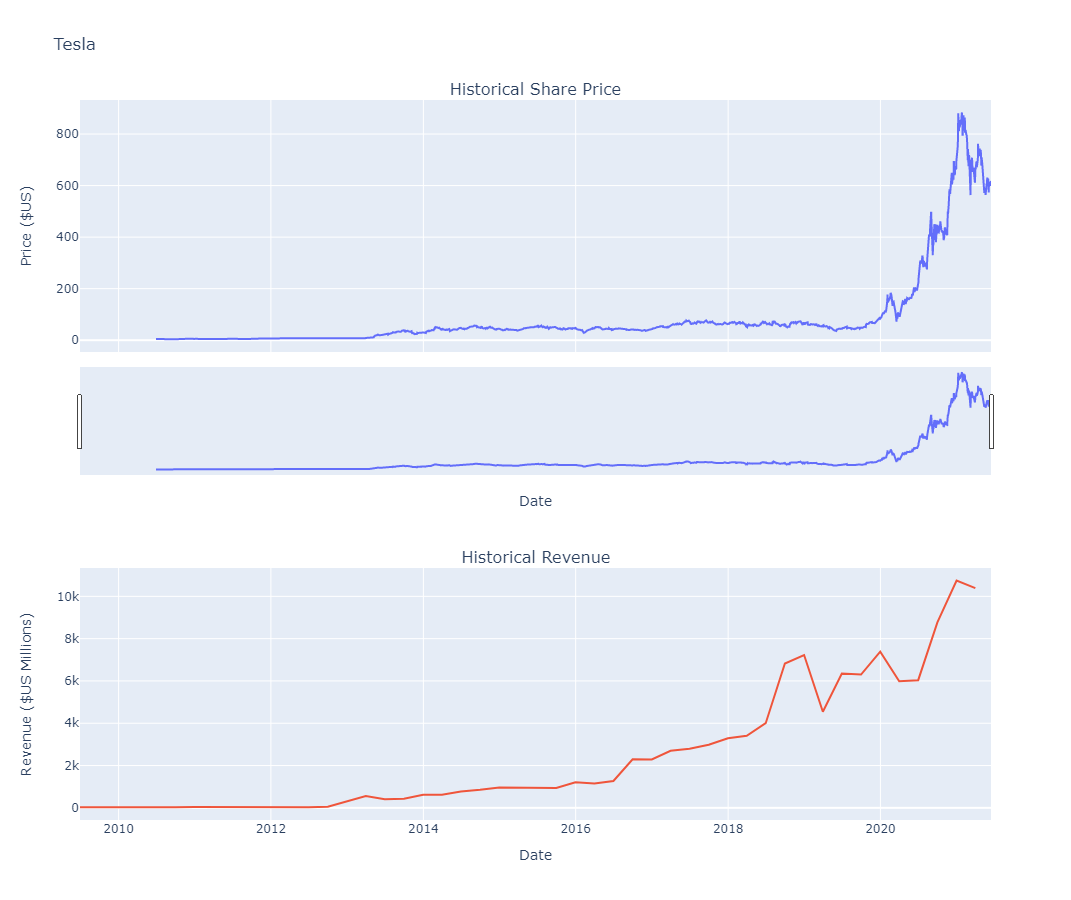

In [22]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

## Plotting GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


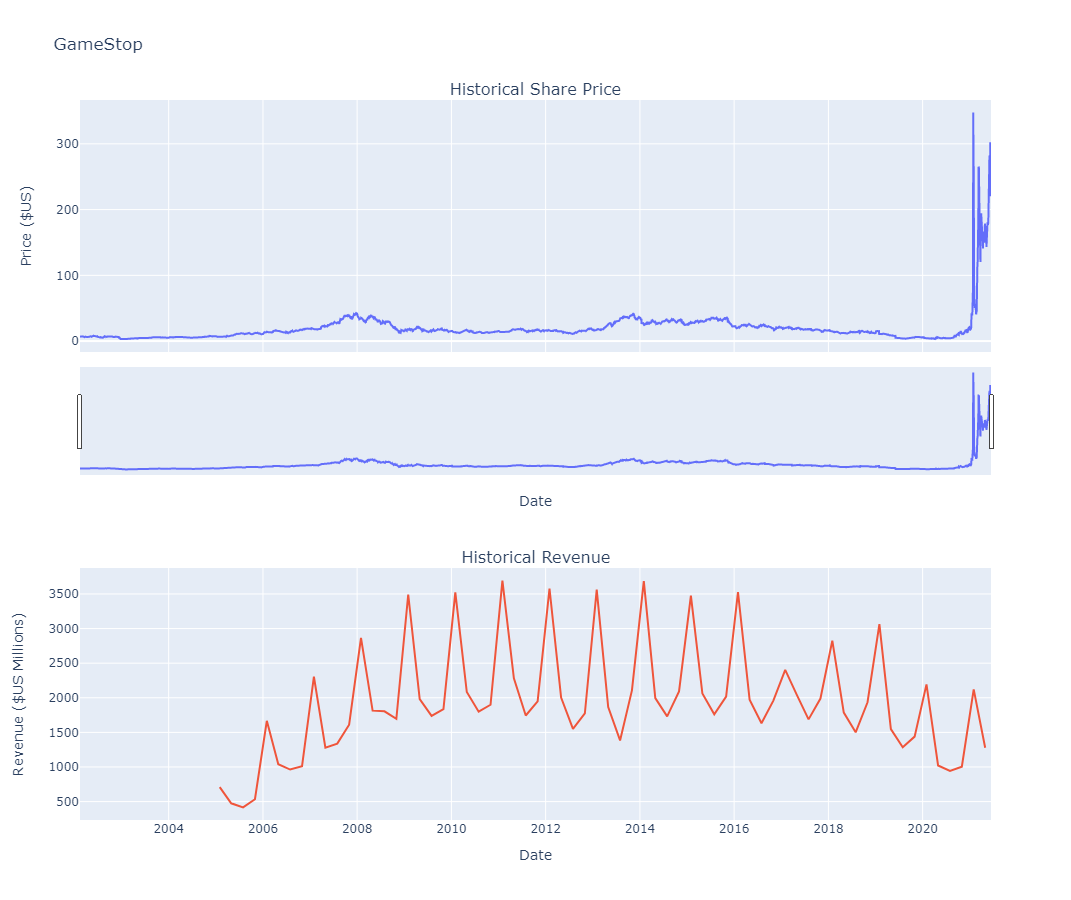

In [23]:
make_graph(gme_data, gme_revenue, 'GameStop')